In [345]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline
# load call center data set
waiting_times_day = np.loadtxt('call_center.csv')


In [346]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]
# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
    #return current_time
#return waiting_times_per_hour.append(t)

for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {len(calls_in_hour)} calls')

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls


In [359]:
al=[]
ah=[]
alpha = 1
beta = 0.25
post_per_hour = []
post_mean=[]
alpha_per_hour = []
beta_per_hour = []


for h, value in enumerate(waiting_times_per_hour):
      # calculate posterior hyperparameters
    n=np.array(value)# converting from list to array
    a = alpha + n.size
    b = beta + n.sum()
    
 # gamma posterior distribution
    posterior = sts.gamma(a, scale=1/b)#gamma and Poisson distribution form a conjugate pair

    alpha_per_hour.append(a)
    beta_per_hour.append(b)
    al.append(posterior.ppf(0.01))
    ah.append(posterior.ppf(0.99))
    post_per_hour.append(posterior)
    post_mean.append(posterior.mean())

    print ("98% confidence interval of λ: [{:.4f}, {:.4f}]".format(posterior.ppf(0.01), posterior.ppf(0.99)))
    print ("mean of λ: {:.2f}".format(posterior.mean()))
    print("Posterior for hour {:d} is: |α = {:.4f}|, |β = {:.4f}|".format(h, alpha, beta))

    
    

98% confidence interval of λ: [0.0292, 0.2144]
mean of λ: 0.10
Posterior for hour 0 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [0.0191, 0.1731]
mean of λ: 0.07
Posterior for hour 1 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [0.0303, 0.1896]
mean of λ: 0.09
Posterior for hour 2 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [0.0946, 0.4692]
mean of λ: 0.24
Posterior for hour 3 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [0.2686, 0.6641]
mean of λ: 0.44
Posterior for hour 4 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [0.6421, 1.2136]
mean of λ: 0.90
Posterior for hour 5 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [1.2344, 1.9977]
mean of λ: 1.59
Posterior for hour 6 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [2.3974, 3.4133]
mean of λ: 2.88
Posterior for hour 7 is: |α = 1.0000|, |β = 0.2500|
98% confidence interval of λ: [3.6614, 4.9015]
mean of λ: 4.26
Posterior for hou

In [353]:
import pandas as pd
import numpy as np
s=np.array([[al],[ah]])
w=pd.DataFrame (al,ah)
w


,0
0.214366,0.029195
0.173074,0.019077
0.189598,0.030322
0.469201,0.094566
0.664063,0.268623
1.213607,0.642134
1.997676,1.234438
3.413310,2.397378
4.901515,3.661418
6.469408,5.036669


In [363]:
import pandas as pd
sd=pd.DataFrame (posterior_mean, columns=["posterior_mean"])
sd

,posterior_mean
0,0.098119
1,0.074571
2,0.091087
3,0.242653
4,0.442333
5,0.903312
6,1.591188
7,2.881007
8,4.256925
9,5.728696


In [389]:
per_hour_mean=[post.mean() for post in post_per_hour]
confidence_98_per_hour = ([post.mean() - post.ppf(0.01) for post in post_per_hour])


Text(0, 0.5, 'call rates per minute')

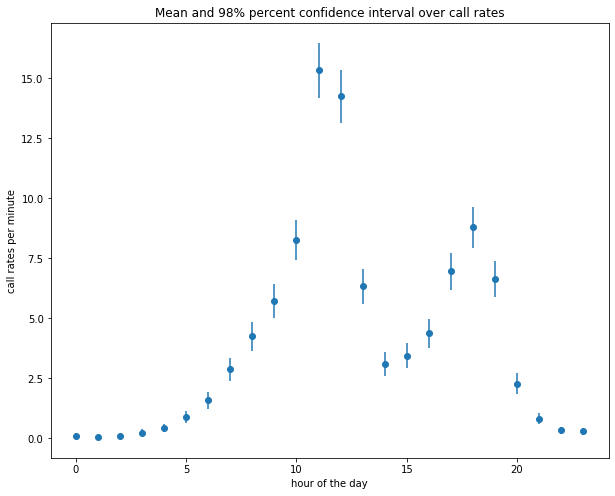

In [403]:
#plotting confiden
plt.errorbar(x=range(0, 24), y=per_hour_mean, yerr=confidence_98_per_hour, linestyle="none",fmt='o')
plt.title("Mean and 98% percent confidence interval over call rates")
plt.xlabel("hour of the day")
plt.xticks(list(range(0, 24,5)))
plt.ylabel("call rates per minute") 

Text(0.5, 1.0, 'The gamma posterior distribution')

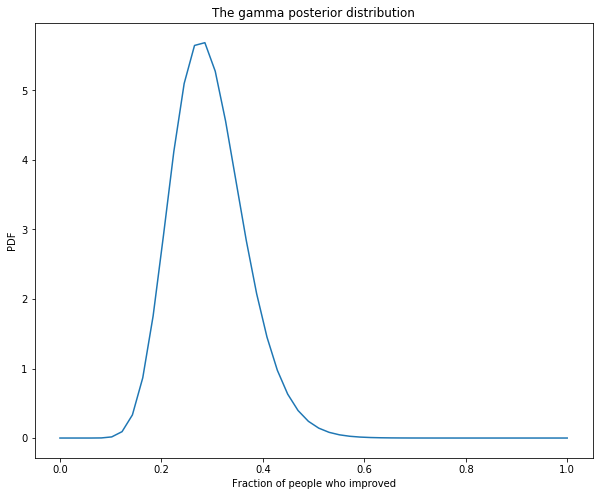

In [361]:
X = np.linspace(0, 1)
plt.plot(X, posterior.pdf(X))
plt.xlabel("Fraction of people who improved")
plt.ylabel("PDF")
plt.title("The gamma posterior distribution")